In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
geo_df = pd.read_csv("olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv("olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
categname_df = pd.read_csv("product_category_name_translation.csv")
pd.set_option('display.max_columns', 500)

Analisando os primeiros Clientes aqui tempos as colunas importantes sendo:\\
* Cidade
* Estado

In [3]:
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Vamos analisar de forma geral a nossa base de dados

In [4]:
print("customers_df:")
display(customers_df.head())

print("\ngeo_df:")
display(geo_df.head())

print("\norderitem_df:")
display(orderitem_df.head())

print("\norderpay_df:")
display(orderpay_df.head())

print("\norderreviews_df:")
display(orderreviews_df.head())

print("\norders_df:")
display(orders_df.head())

print("\nproducts_df:")
display(products_df.head())

print("\nsellers_df:")
display(sellers_df.head())

print("\ncategname_df:")
display(categname_df.head())

customers_df:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



geo_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



orderitem_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



orderpay_df:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



orderreviews_df:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



orders_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



products_df:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



sellers_df:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



categname_df:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Renomenando as colunas

In [5]:
customers_df = customers_df.rename(columns = { 'customer_zip_code_prefix': 'zip_code'})
geo_df = geo_df.rename(columns = {'geolocation_zip_code_prefix':'zip_code'})

## Juntando tudo

Este trecho de código combina os DataFrames `orders_df`, `customers_df`, `orderitem_df`, `products_df`, `categname_df`, `orderpay_df`, `sellers_df` e `orderreviews_df`, usando o método `merge()` da biblioteca `pandas`. Cada DataFrame é combinado com o próximo usando uma coluna em comum como chave de junção.

O resultado da combinação é salvo em um novo DataFrame chamado `dados_completos`. Ao final dessa operação, o DataFrame `dados_completos` contém informações sobre os pedidos, clientes, itens do pedido, produtos, categorias de produtos, pagamentos, vendedores e avaliações de pedidos.

Esse processo de combinar vários DataFrames em um só é útil para consolidar dados dispersos em um único lugar e facilitar a análise dos dados.

In [6]:
df = orders_df.merge(customers_df, on = 'customer_id').merge(orderitem_df, on = 'order_id').merge(products_df, on = 'product_id').merge(categname_df, on = 'product_category_name').merge(orderpay_df, on = 'order_id').merge(sellers_df, on = 'seller_id').merge(orderreviews_df, on='order_id')

In [7]:
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


In [8]:
df.shape


(115609, 40)

In [9]:
df.describe()

,zip_code,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958,4.034409
std,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968,1.385584
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000,4.000000
50%,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000,5.000000
75%,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000,5.000000


### Calculo de valores nulos

In [10]:
percentual = (100* df.isna().sum() / len(df)).sort_values(ascending = False)

total = (df.isna().sum() / len(df)).sort_values(ascending = False)

Podemos observar que os dados ausentes se devem principalmente ao fato de os clientes optarem por não deixar um comentário de avaliação sobre os produtos que compraram e algumas entregas com falhas.

Vamos remover as linhas vazios devido ao alto percentual de pessoas que não deixam avaliação nos pedidos e valores ausentes com baixa porcentagem.

In [11]:
df.drop(['review_comment_title', 'review_comment_message'],
        axis = 1, inplace = True)

In [12]:
df.dropna(axis = 0, inplace = True)

In [13]:
percentual = (100* df.isna().sum() / len(df)).sort_values(ascending = False)

total = (df.isna().sum() / len(df)).sort_values(ascending = False)

missing_values = pd.concat([total, percentual],
                           axis = 1, keys = ['Total', '% de valores ausentes'])

missing_values

,Total,% de valores ausentes
order_id,0.0,0.0
payment_type,0.0,0.0
product_photos_qty,0.0,0.0
product_weight_g,0.0,0.0
product_length_cm,0.0,0.0
product_height_cm,0.0,0.0
product_width_cm,0.0,0.0
product_category_name_english,0.0,0.0
payment_sequential,0.0,0.0
payment_installments,0.0,0.0


In [14]:
df.describe()

,zip_code,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000
mean,35085.687437,1.195065,119.846650,20.002595,48.802894,784.727183,2.206833,2106.236075,30.278091,16.597422,23.099679,1.090818,2.943680,171.557922,24525.441352,4.082505
std,29867.822574,0.687526,181.079901,15.711728,10.016138,650.332251,1.718331,3765.207714,16.145105,13.437427,11.735929,0.686674,2.779181,264.197701,27648.963528,1.345924
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.850000,6429.000000,4.000000
50%,24315.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,107.960000,13660.000000,5.000000
75%,58865.000000,1.000000,132.980000,21.190000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.150000,28495.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,26.000000,24.000000,13664.080000,99730.000000,5.000000


Como estão distribuídos os Reviews ?

In [15]:
fig = px.histogram( df, x = 'review_score')
fig.show()


In [16]:
#transforma os valores em porcentagem
percentage = df['review_score'].value_counts(normalize = True)*100

percentage.index

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [17]:
perc = df['review_score'].value_counts(normalize = True)*100
perc
notas = list(perc.index)
notas

fig = px.bar(perc, x = notas,
             y = perc.values,
             text = perc.values,
             labels={'x':'nota', 'y':'Porcentagem'},
             title = 'Distribuição dos Reviews')
fig.update_traces(texttemplate = '%{text:.2f}%', textposition = 'inside')
fig.show()

Podemos destacar alguns pontos sobre este gráfico

* Mais de 75% dos clientes deram uma pontuação igual ou maior que 4.
* 12,5% deram uma pontuação de 1
* cerca de 12% deram uma pontuação de 3 ou 2.

Análise dos clientes que geram maior receita

In [18]:
# Clientes com o maior número cumulativo de pedidos (em pagamentos).
top_customers = df.groupby("customer_unique_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_customers.rename(columns={"payment_value":"total_paid"}, inplace=True)

In [19]:
# Calcular as colunas com "% of total Sales" e "Cum % of total Sales"

top_customers['% of Total Sales'] = (top_customers['total_paid'] / top_customers['total_paid'].sum())*100

top_customers['Cum % of Total Sales'] = top_customers['% of Total Sales'].cumsum()

In [20]:
#Gráfico de linhas
l = len(top_customers)
fig = px.line(top_customers, x = range(1, l + 1), y = 'Cum % of Total Sales')



# definir as etiquetas do eixo x e y e o título do gráfico
fig.update_layout(
    xaxis_title="Número de Clientes",
    yaxis_title="Total Vendas Cumulativo %",
    title="Contribuição % para as vendas por número de clientes"
)

# adicionar uma linha de preenchimento abaixo do gráfico
fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0=0,
    y0=0,
    x1=40000,
    y1=1,
    fillcolor="green",
    opacity=0.2,
    layer="below"
)

# atualizar o layout da forma para ajustar a altura do preenchimento
fig.update_shapes(dict(xref='x', yref='paper'))

# adicionar um texto explicativo na figura
fig.add_annotation(
    x=55000,
    y=75,
    text="40k clientes (+-42% do total)<br> representam +-80% das vendas",
    font=dict(
        size=14,
        color="black"
    ),
    showarrow=False,
)

# exibir a figura
fig.show()

In [21]:
# renomeando a coluna 'payment_value' para 'total_paid'
top_customers.rename(columns={'payment_value':'total_paid'}, inplace=True)

# Gráfico de barras do Plotly
fig = px.bar(top_customers[:10], x = 'total_paid', y = 'customer_unique_id', orientation = 'h')

fig.update_layout(title = 'top 10 Clientes por Valor total Pago',
                  xaxis_title = 'Valor total Pago',
                  yaxis_title = 'ID do Cliente único'
)


fig.show()

Em quais Cidades se há a maior ocorrência de compras?

In [22]:
#Agrupando o df por id do comprador e contando o número de ordem id por estado
top_pedidos_city = df.groupby('customer_state')['order_id'].count().reset_index().sort_values('order_id', ascending= False)

#renomeando as colunas "order_id' para "count'
top_pedidos_city.rename(columns={'order_id':'count'}, inplace = True)

#Criando um gráfico de barras


In [23]:
fig = px.bar(top_pedidos_city[:10], x = 'customer_state', y = 'count', color = 'customer_state', orientation = 'v')

fig.update_layout(
    title = 'Top 10 estados por número de pedidos',
    xaxis_title = 'número de pedidos',
    yaxis_title = 'estado')

fig.update_traces(textposition = 'outside')

fig.show()

Dentro de cada estado, vamos verificar quais cidades geram maior receita

In [24]:
top_pedidosporvalor_city= df.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_pedidosporvalor_city["% of Total Payments"] = (top_pedidosporvalor_city["payment_value"] / top_pedidosporvalor_city["payment_value"].sum()) * 100
top_pedidosporvalor_city["Cum % of Total Payments"] = top_pedidosporvalor_city["% of Total Payments"].cumsum()

In [25]:
fig = px.bar(top_pedidosporvalor_city[:10], x = "customer_city", y =  "% of Total Payments", color = 'customer_city', orientation = 'v')

fig.update_layout(
    title = 'TOP 10 Cidades por Geração de Receita',
    xaxis_title = 'Cidade do Cliente',
    yaxis_title = 'Porcentagem do Total de Pagamentos'
)

fig.show()

## Vamos verificar o comportamento dos pedidos ao longo do período.

In [28]:
# Total de pedidos por hora e por dia da semana.
df_cols = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
            "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
            "review_creation_date", "review_answer_timestamp"]

for col in df_cols:
  df[col] = pd.to_datetime(df[col])

In [29]:
#Pedidos por hora

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
pedidos_hora = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.hour)['order_id'].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)
pedidos_hora.rename(columns={"order_id":"Total Orders", "order_purchase_timestamp": "Hour of Day"}, inplace=True)


In [30]:
pedidos_hora

,Hour of Day,Total Orders
23,23,4123
22,22,5816
21,21,6217
20,20,6193
19,19,5982
18,18,5769
17,17,6150
16,16,6675
15,15,6454
14,14,6569


In [31]:
fig = px.bar(pedidos_hora, x = 'Hour of Day', y = 'Total Orders', title = 'Número de pedidos por hora do dia')
fig.update_xaxes(title = 'Hora do dia')
fig.update_yaxes(title = 'Número total de pedidos')
fig.show()

Como podemos visualizar, os pedidos começam a aumentar por volta das 6h da manhã e atingem o pico às 16h. Além disso, o número de pedidos mais frequêntes concentram-se durante a tarde.

#Vamos verificar total de pedidos por dia da semana.

In [32]:
pedidos_semana = df.groupby(df['order_purchase_timestamp'].dt.day_name())['order_id'].count().reset_index()
pedidos_semana.rename(columns ={'order_id':'Total de pedidos','order_purchase_timestamp':'Dia da semana'}, inplace = True)
pedidos_semana = pedidos_semana.sort_values(by="Total de pedidos", ascending = False)
pedidos_semana

,Dia da semana,Total de pedidos
5,Tuesday,18405
1,Monday,18369
6,Wednesday,17673
4,Thursday,16906
0,Friday,16185
3,Sunday,13449
2,Saturday,12206


In [33]:
fig = px.bar(pedidos_semana, x='Dia da semana', y='Total de pedidos', title='Número de pedidos por dia da semana')
fig.update_xaxes(title='Dia da semana')
fig.update_yaxes(title='Número total de pedidos')
fig.show()


Podemos ver que os maiores números de pedidos estão concentrados entre às Segundas, terças e quartas.

In [34]:
# Define a ordem dos dias da semana
#weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converte a coluna "Weekday Name" em uma categoria ordenada
#weekday = pd.Categorical(pedidos_semana['Dia da semana'], categories=weekday_order, ordered=True)

# Cria um novo dataframe ordenado pela coluna de categoria "weekday"
#pedidos_semana_ordered = pedidos_semana.assign(weekday=weekday).sort_values('weekday')

# Cria um gráfico de barras com os dias da semana em ordem
#fig = px.bar(pedidos_semana_ordered, x='Dia da semana', y='Total de pedidos', title='Número de pedidos por dia da semana')
#fig.update_xaxes(title='Dia da semana')
#fig.update_yaxes(title='Número total de pedidos')
#fig.show()


#Avaliação dos produtos

In [35]:
reviewsocres = df.groupby("product_category_name")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
melhorestaxas = reviewsocres[reviewsocres["count"]>=30][:10]

fig = go.Figure(go.Bar(
            x=melhorestaxas['mean'],
            y=melhorestaxas.index,
            orientation='h'))

fig.update_layout(
    title='Produtos com as melhores avaliações',
    xaxis_title='Avaliação média',
    yaxis_title='Categoria do produto',
    height=600,
    width=800,
    margin=dict(l=100, r=20, t=50, b=50),
)

fig.show()

In [36]:
reviewscores = df.groupby('product_category_name')['review_score'].agg(['mean', 'count']).sort_values(by="mean",ascending=False)
piortaxa = reviewscores[reviewscores['count']>=30].sort_values(by = 'mean')[:10]

fig = go.Figure(go.Bar(
            x=piortaxa['mean'],
            y=piortaxa.index,
            orientation='h'))

fig.update_layout(
    title='Produtos com as piores avaliações',
    xaxis_title='Avaliação média',
    yaxis_title='Categoria do produto',
    height=600,
    width=800,
    margin=dict(l=100, r=20, t=50, b=50),
)

fig.show()


## Avaliando a forma de pagamento e o comportamento das compras

Aqui podemos verificar quais são os métodos de pagamentos mais frequentes.
A compra foi feita em dinheiro, cartão, pix?

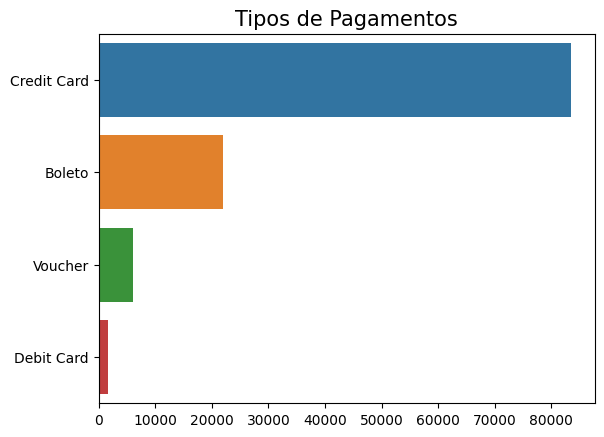

In [37]:
compras = pd.crosstab(df["payment_type"], df["order_status"])
tipos_pagamentos = df.payment_type.value_counts()

sns.barplot( x = tipos_pagamentos.to_list(), y = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card'] )
plt.title('Tipos de Pagamentos', fontsize = 15)
plt.show()

Há uma maior taxa de cancelamento para o cartão de crédito, porém, a taxa média do cancelamento se mantém para todas as modalidades de pagamento.

# Avaliando a relação entre tempo de entrega e avaliação do produto.

In [ ]:
# Adicionando uma coluna delta que calcula o tempo que levou para o pedido ser entregue
df["TimeToDeliveryinHours"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"])
df["TimeToDeliveryinHours"] = df["TimeToDeliveryinHours"].apply(lambda x: x.total_seconds())
df["TimeToDeliveryinHours"] = round((df["TimeToDeliveryinHours"] / 3600) / 24, 2)
df.rename(columns={"TimeToDeliveryinHours" : "TimeToDeliveryinDays"}, inplace=True)


In [ ]:

df[["TimeToDeliveryinDays"]].describe()

In [ ]:
# Define a ordem crescente dos valores da pontuação de avaliação
score_order = sorted(df['review_score'].unique())

# Converte a coluna "review_score" em uma categoria ordenada
score = pd.Categorical(df['review_score'], categories=score_order, ordered=True)

# Cria um novo dataframe ordenado pela coluna de categoria "score"
df_ordered = df.assign(score=score).sort_values('score')

# Cria um seletor de pontuação de avaliação em ordem crescente
fig = px.box(df_ordered, x='score', y='TimeToDeliveryinDays', color='score',
             title='Relação entre a pontuação da avaliação e o tempo de entrega')

fig.update_xaxes(title='Pontuação da avaliação')
fig.update_yaxes(title='Tempo de entrega (dias)')

fig.show()

In [ ]:
# Define o limite superior dos valores
q_high = df["TimeToDeliveryinDays"].quantile(0.95)

# Cria um novo dataframe sem os valores atípicos
df_no_outliers = df[df["TimeToDeliveryinDays"] < q_high]

# Define a ordem crescente dos valores da pontuação de avaliação
score_order = sorted(df_no_outliers['review_score'].unique())

# Converte a coluna "review_score" em uma categoria ordenada
score = pd.Categorical(df_no_outliers['review_score'], categories=score_order, ordered=True)

# Cria um novo dataframe com a coluna de categoria "score"
df_score = df_no_outliers.assign(score=score)

df_score = df_score.assign(score=score).sort_values('score')

# Cria um seletor de pontuação de avaliação em ordem crescente
fig = px.box(df_score, x='score', y='TimeToDeliveryinDays', color='score',
             title='Relação entre a pontuação da avaliação e o tempo de entrega')

fig.update_xaxes(title='Pontuação da avaliação', categoryorder='array', categoryarray=score_order)
fig.update_yaxes(title='Tempo de entrega (dias)')

fig.show()

#Análise RFM
* Recência
* Frequência
* Valor Monetário


In [39]:
#Recência
#Agrupando os clientes através do ID para encontrar os pedidos mais recentes de cada:

df_recency = df.groupby( by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()

df_recency.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [40]:
#Renomeando a coluna 'Order_purchase_timestamp' para Data da última compra.
df_recency.rename(columns = {'order_purchase_timestamp':'data_ultima_compra'}, inplace = True)

#Extraindo somente a data, do campo data/hora
df_recency['data_ultima_compra'] = df_recency['data_ultima_compra'].dt.date

#Usando o último pedido em todo o conjunto de dados como ponto de referência para calcular a atualidade:
data_recente = df['order_purchase_timestamp'].dt.date.max()


In [41]:
#Incluindo uma coluna para recência
df_recency['Recency'] = df_recency['data_ultima_compra'].apply(lambda x: (data_recente - x).days)

df_recency.head()

,customer_unique_id,data_ultima_compra,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,114
2,0000f46a3911fa3c0805444483337064,2017-03-10,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,288
